# Simple Linear Regression with Synthetic Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

### below is code that defines:
 - `build_model(my_learning_rate)`, which builds an empty model.
 - `train_model(model, feature, label, epochs)`, which trains the model

this code will be expressed upon later

In [2]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


### below is code that defines:
 - `plot_the_model(trained_weight, trained_bias, feature, label)`, plots feature values vs. the label values
 - `plot_the_loss_curve(epochs, rmse)`, plots the loss curve

this code will be expressed upon later

In [3]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### Define the dataset

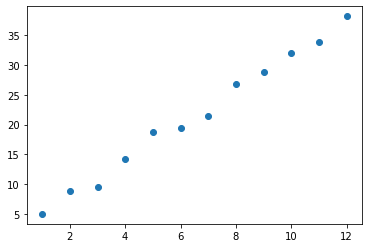

In [4]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
plt.scatter(my_feature, my_label)

### Specifiy the hyperparameters

Epoch 1/10
1/1 [==============================] - 0s 992us/step - loss: 457.0211 - root_mean_squared_error: 21.3781
Epoch 2/10
1/1 [==============================] - 0s 993us/step - loss: 445.9373 - root_mean_squared_error: 21.1172
Epoch 3/10
1/1 [==============================] - 0s 497us/step - loss: 438.0280 - root_mean_squared_error: 20.9291
Epoch 4/10
1/1 [==============================] - 0s 992us/step - loss: 431.4830 - root_mean_squared_error: 20.7722
Epoch 5/10
1/1 [==============================] - 0s 992us/step - loss: 425.7296 - root_mean_squared_error: 20.6332
Epoch 6/10
1/1 [==============================] - 0s 992us/step - loss: 420.5028 - root_mean_squared_error: 20.5062
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 415.6548 - root_mean_squared_error: 20.3876
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 411.0940 - root_mean_squared_error: 20.2755
Epoch 9/10
1/1 [==============================] - 0s 497us/step - loss: 406.

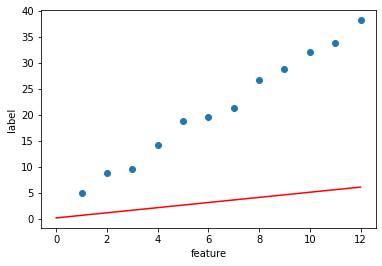



does our loss flatten out meaning converge?



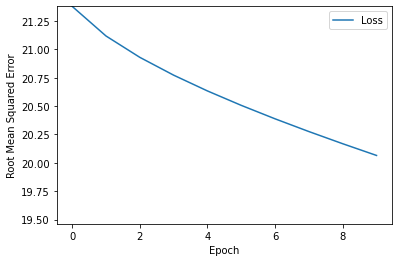

In [5]:
# hyperparamters
learning_rate=0.01
epochs=10
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### increase the number of epochs

lets try and increase the number of epochs to allow for more iterations

Epoch 1/100
1/1 [==============================] - 0s 991us/step - loss: 573.0929 - root_mean_squared_error: 23.9394
Epoch 2/100
1/1 [==============================] - 0s 992us/step - loss: 560.6713 - root_mean_squared_error: 23.6785
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 551.7914 - root_mean_squared_error: 23.4902
Epoch 4/100
1/1 [==============================] - 0s 496us/step - loss: 544.4340 - root_mean_squared_error: 23.3331
Epoch 5/100
1/1 [==============================] - 0s 992us/step - loss: 537.9595 - root_mean_squared_error: 23.1940
Epoch 6/100
1/1 [==============================] - 0s 496us/step - loss: 532.0718 - root_mean_squared_error: 23.0667
Epoch 7/100
1/1 [==============================] - 0s 496us/step - loss: 526.6061 - root_mean_squared_error: 22.9479
Epoch 8/100
1/1 [==============================] - 0s 498us/step - loss: 521.4601 - root_mean_squared_error: 22.8355
Epoch 9/100
1/1 [==============================] - 0s 497us/step -

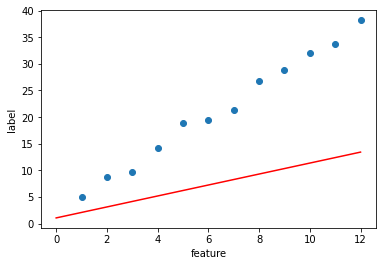



does our loss flatten out meaning converge?



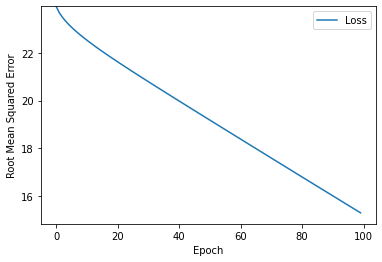

In [6]:
# hyperparamters
learning_rate=0.01
epochs=100
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### increase the learning rate to 1

let's incrase the learning rate to allow for faster learning

Epoch 1/100
1/1 [==============================] - 0s 983us/step - loss: 268.5814 - root_mean_squared_error: 16.3885
Epoch 2/100
1/1 [==============================] - 0s 993us/step - loss: 95.8933 - root_mean_squared_error: 9.7925
Epoch 3/100
1/1 [==============================] - 0s 987us/step - loss: 18.0023 - root_mean_squared_error: 4.2429
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 4.5168 - root_mean_squared_error: 2.1253
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 1.9033 - root_mean_squared_error: 1.3796
Epoch 6/100
1/1 [==============================] - 0s 992us/step - loss: 1.2611 - root_mean_squared_error: 1.1230
Epoch 7/100
1/1 [==============================] - 0s 993us/step - loss: 1.0645 - root_mean_squared_error: 1.0318
Epoch 8/100
1/1 [==============================] - 0s 992us/step - loss: 0.9939 - root_mean_squared_error: 0.9970
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9683 - root_me

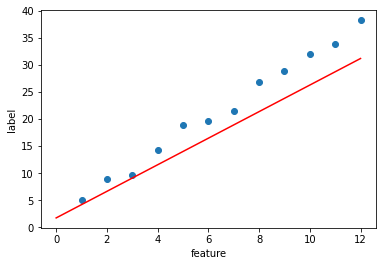



does our loss flatten out meaning converge?



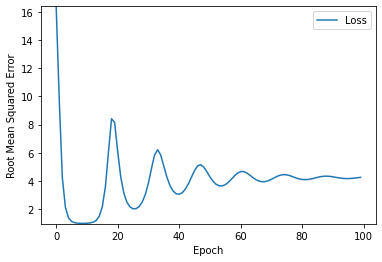

In [7]:
# hyperparamters
learning_rate=1
epochs=100
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### learning rate too high as RMSE increases. 

let's decrease learning rate to 0.1

Epoch 1/100
1/1 [==============================] - 0s 993us/step - loss: 636.5839 - root_mean_squared_error: 25.2306
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 511.7607 - root_mean_squared_error: 22.6221
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 433.9282 - root_mean_squared_error: 20.8309
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 375.7701 - root_mean_squared_error: 19.3848
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 329.0277 - root_mean_squared_error: 18.1391
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 289.9565 - root_mean_squared_error: 17.0281
Epoch 7/100
1/1 [==============================] - 0s 495us/step - loss: 256.4981 - root_mean_squared_error: 16.0156
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 227.3832 - root_mean_squared_error: 15.0792
Epoch 9/100
1/1 [==============================] - 0s 497us/step - loss: 201

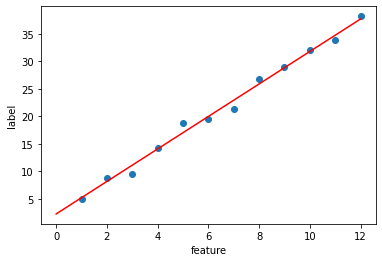



does our loss flatten out meaning converge?



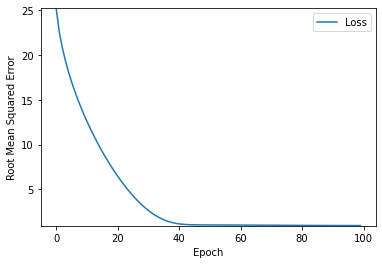

In [8]:
# hyperparamters
learning_rate=0.1
epochs=100
my_batch_size=12

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### let's decrase the batch size 

- we're not overfitting to the whole data set
- and for faster learning

Epoch 1/40
6/6 [==============================] - 0s 992us/step - loss: 333.9930 - root_mean_squared_error: 18.2755
Epoch 2/40
6/6 [==============================] - 0s 992us/step - loss: 141.5425 - root_mean_squared_error: 11.8972
Epoch 3/40
6/6 [==============================] - 0s 827us/step - loss: 65.3771 - root_mean_squared_error: 8.0856
Epoch 4/40
6/6 [==============================] - 0s 827us/step - loss: 26.9116 - root_mean_squared_error: 5.1876
Epoch 5/40
6/6 [==============================] - 0s 744us/step - loss: 9.2768 - root_mean_squared_error: 3.0458
Epoch 6/40
6/6 [==============================] - 0s 827us/step - loss: 2.7270 - root_mean_squared_error: 1.6514
Epoch 7/40
6/6 [==============================] - 0s 827us/step - loss: 1.1951 - root_mean_squared_error: 1.0932
Epoch 8/40
6/6 [==============================] - 0s 909us/step - loss: 1.1228 - root_mean_squared_error: 1.0596
Epoch 9/40
6/6 [==============================] - 0s 910us/step - loss: 1.0053 - root_me

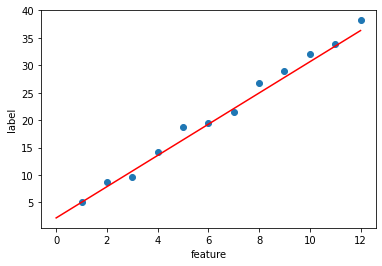



does our loss flatten out meaning converge?



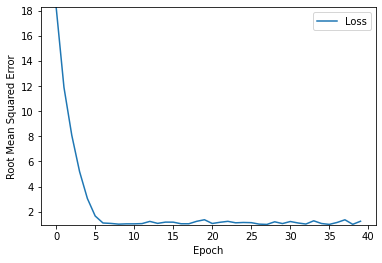

In [9]:
# hyperparamters
learning_rate=0.1
epochs=40
my_batch_size=2

# build model
my_model = build_model(learning_rate)

# train model
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                         my_feature, 
                                                         my_label, 
                                                         epochs,
                                                         my_batch_size)
# plot the model
print("\n\ndoes the red line fit the data?\n")
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss by epoch
print("\n\ndoes our loss flatten out meaning converge?\n")
plot_the_loss_curve(epochs, rmse)

### Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

- Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
- If the training loss does not converge, train for more epochs.
- If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
- If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
- Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
- Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
- For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

# Linear Regression with a Real Dataset

In [10]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [11]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [19]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


#### DEFINE THE NETWORK AND PLOTTING FUNCTIONS

In [28]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the create_model and traing_model functions.
Defined the plot_the_model and plot_the_loss_curve functions.


#### MODEL using **total_rooms** as the feature

Epoch 1/10
567/567 [==============================] - 1s 997us/step - loss: 29315.2500 - root_mean_squared_error: 171.2170
Epoch 2/10
567/567 [==============================] - 1s 982us/step - loss: 27866.3965 - root_mean_squared_error: 166.9323
Epoch 3/10
567/567 [==============================] - 1s 997us/step - loss: 26941.9238 - root_mean_squared_error: 164.1400
Epoch 4/10
567/567 [==============================] - 1s 981us/step - loss: 26195.7871 - root_mean_squared_error: 161.8511
Epoch 5/10
567/567 [==============================] - 1s 972us/step - loss: 25698.4805 - root_mean_squared_error: 160.3074
Epoch 6/10
567/567 [==============================] - 1s 990us/step - loss: 24826.4336 - root_mean_squared_error: 157.5641
Epoch 7/10
567/567 [==============================] - 1s 973us/step - loss: 24270.5762 - root_mean_squared_error: 155.7902
Epoch 8/10
567/567 [==============================] - 1s 995us/step - loss: 23516.6328 - root_mean_squared_error: 153.3513
Epoch 9/10
567/5

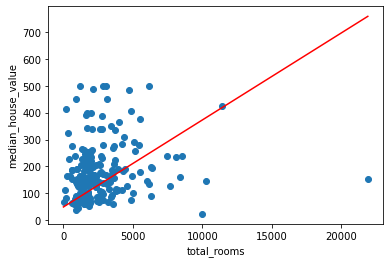

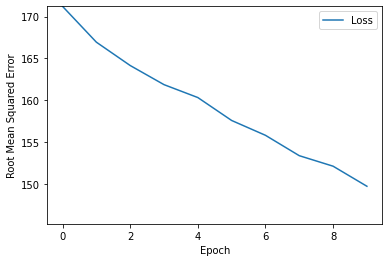

In [30]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 10
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### MAKING PREDICTIONS

In [31]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [16]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             158
 3400     92             177
 3677     69             181
 2202     62             162
 2403     80             164
 5652    295             207
 3318    500             176
 2552    342             166
 1364    118             150
 3468    128             178


Epoch 1/30
142/142 [==============================] - 0s 1ms/step - loss: 37965.0117 - root_mean_squared_error: 194.8461
Epoch 2/30
142/142 [==============================] - 0s 982us/step - loss: 18039.0977 - root_mean_squared_error: 134.3097
Epoch 3/30
142/142 [==============================] - 0s 989us/step - loss: 8541.2852 - root_mean_squared_error: 92.4191
Epoch 4/30
142/142 [==============================] - 0s 992us/step - loss: 7018.3608 - root_mean_squared_error: 83.7757
Epoch 5/30
142/142 [==============================] - 0s 961us/step - loss: 7015.3896 - root_mean_squared_error: 83.7579
Epoch 6/30
142/142 [==============================] - 0s 975us/step - loss: 7014.9546 - root_mean_squared_error: 83.7553
Epoch 7/30
142/142 [==============================] - 0s 972us/step - loss: 7015.1138 - root_mean_squared_error: 83.7563
Epoch 8/30
142/142 [==============================] - 0s 978us/step - loss: 7016.2529 - root_mean_squared_error: 83.7631
Epoch 9/30
142/142 [==========

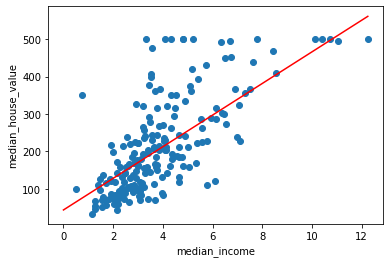

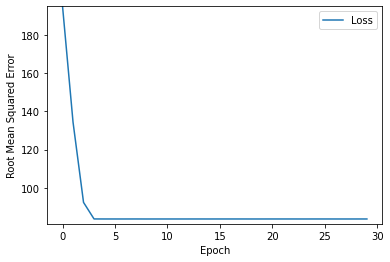

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             135
    4     92             212
    3     69             154
    2     62             133
    3     80             154
    2    295             148
   10    500             457
    5    342             260
    2    118             147
    4    128             221
    8    187             397
    3     80             163
    3    112             179
    4     95             222
    2     69             144


In [32]:
my_feature = "median_income"

# Experiment with the hyperparameters.
learning_rate = 0.1
epochs = 30
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)